In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

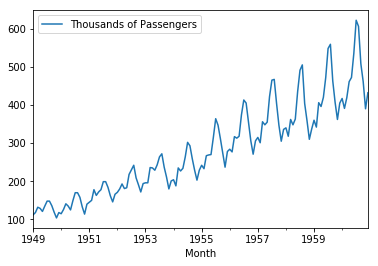

In [23]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.plot();

We'll work on making this time series stationary. The first way is to difference it: (stationary - mean and variance does not change in time)

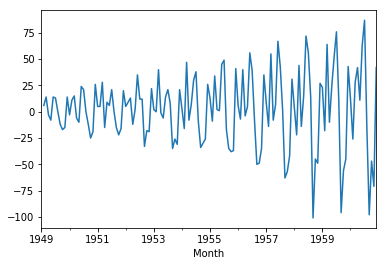

In [24]:
df['d1'] = df['Thousands of Passengers'].diff(1)
df.d1.plot();

Variance obviously changes. Lets try differencing d1 with difference 12 to get rid of seasonality

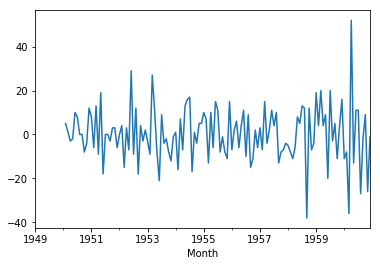

In [25]:
df['d1_d12']=df.d1.diff(12)
df.d1_d12.plot();

Much better, differencing can help stationarizing a timeseries. Next in line: SARIMA models - Seasonal ARIMA, ARIMA with strong seasonal component. It consists of 2 parts: ARIMA model and ARIMA model but constracted on timeseries on lag corresponding to seasonal component. Back to this data above - we'll try logarythm instead of double difference to check if the change is multiplicative

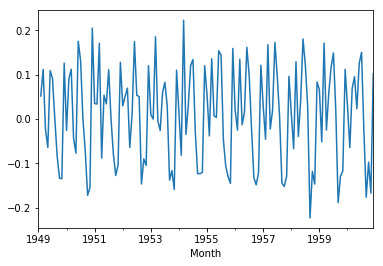

In [27]:
df['log_d1']=np.log(df["Thousands of Passengers"]).diff(1)
df.log_d1.plot();